In [170]:
#import library penting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

%matplotlib inline

In [171]:
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

In [172]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [173]:
data = pd.read_csv("Bank Customer Churn Dataset.csv")

In [174]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,15647311,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,15619304,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,15701354,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,15737888,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


In [175]:
data.shape

(10000, 12)

In [176]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [178]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0000,15690940.5694,71936.1861,15565701.0000,15628528.2500,15690738.0000,15753233.7500,15815690.0000
credit_score,10000.0000,650.5288,96.6533,350.0000,584.0000,652.0000,718.0000,850.0000
age,10000.0000,38.9218,10.4878,18.0000,32.0000,37.0000,44.0000,92.0000
tenure,10000.0000,5.0128,2.8922,0.0000,3.0000,5.0000,7.0000,10.0000
balance,10000.0000,76485.8893,62397.4052,0.0000,0.0000,97198.5400,127644.2400,250898.0900
products_number,10000.0000,1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
credit_card,10000.0000,0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
active_member,10000.0000,0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
estimated_salary,10000.0000,100090.2399,57510.4928,11.5800,51002.1100,100193.9150,149388.2475,199992.4800
churn,10000.0000,0.2037,0.4028,0.0000,0.0000,0.0000,0.0000,1.0000


# Data Cleaning

In [179]:
data = data.drop(['customer_id'], axis = 1)

In [180]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


In [181]:
data.isna().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [182]:
cat_col = data.select_dtypes(include=['object']).columns
num_col = data.select_dtypes(exclude=['object']).columns
df_cat = data[cat_col]
df_num = data[num_col]

# Visualisasi Data

In [183]:
cat_columns = data.select_dtypes(include=['object']).columns
num_columns = data.select_dtypes(exclude=['object']).columns
data_cat = data[cat_columns]
data_num = data[num_columns]

In [184]:
total_customers = len(data)
churned_count = data[data['churn'] == 1]['churn'].count()
not_churned_count = data[data['churn'] == 0]['churn'].count()
percentage_churned = (churned_count / total_customers) * 100
percentage_not_churned = (not_churned_count / total_customers) * 100

print(f"Percentage of customers who churned: {percentage_churned:.2f}%")
print(f"Percentage of customers who did not churn: {percentage_not_churned:.2f}%")

Percentage of customers who churned: 20.37%
Percentage of customers who did not churn: 79.63%


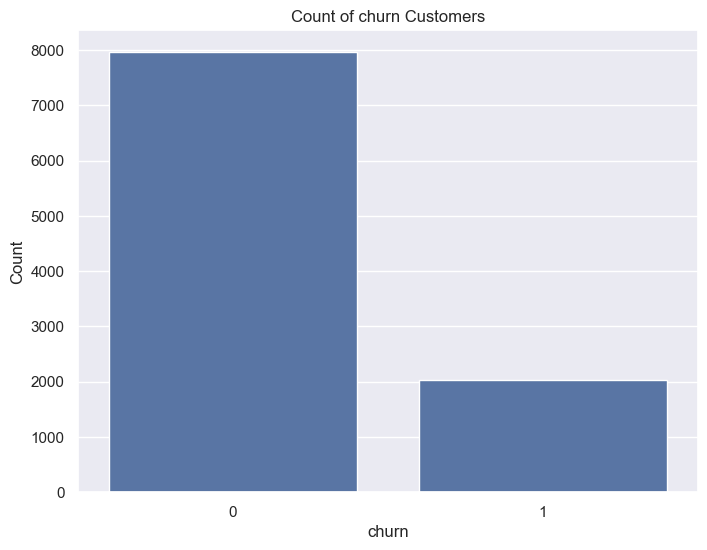

In [185]:
plt.figure(figsize=(8, 6))  
sns.countplot(data=data, x='churn')  
plt.title('Count of churn Customers')  
plt.xlabel('churn')  
plt.ylabel('Count')  
plt.show()

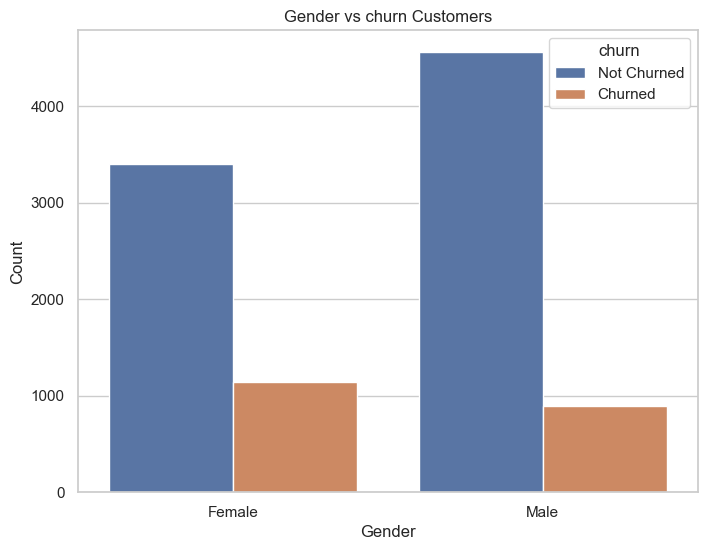

In [186]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gender', hue='churn')
plt.title('Gender vs churn Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

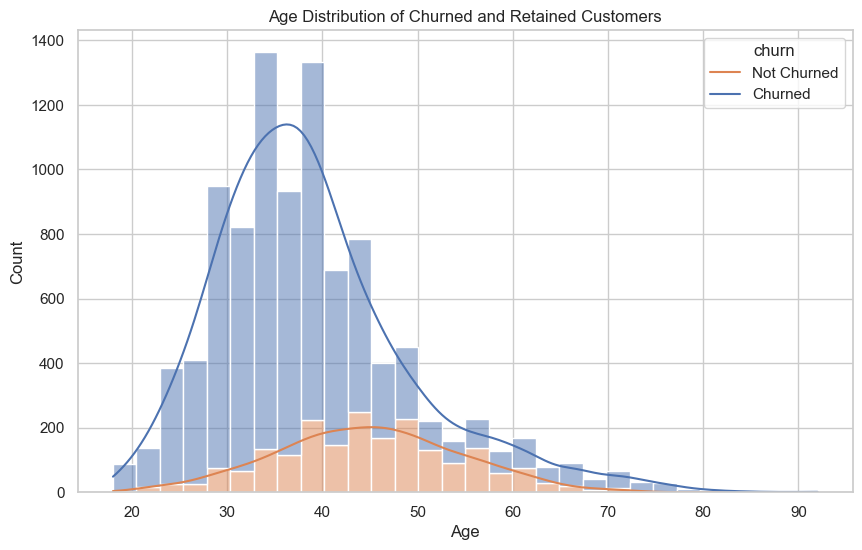

In [187]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x='age', hue='churn', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution of Churned and Retained Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

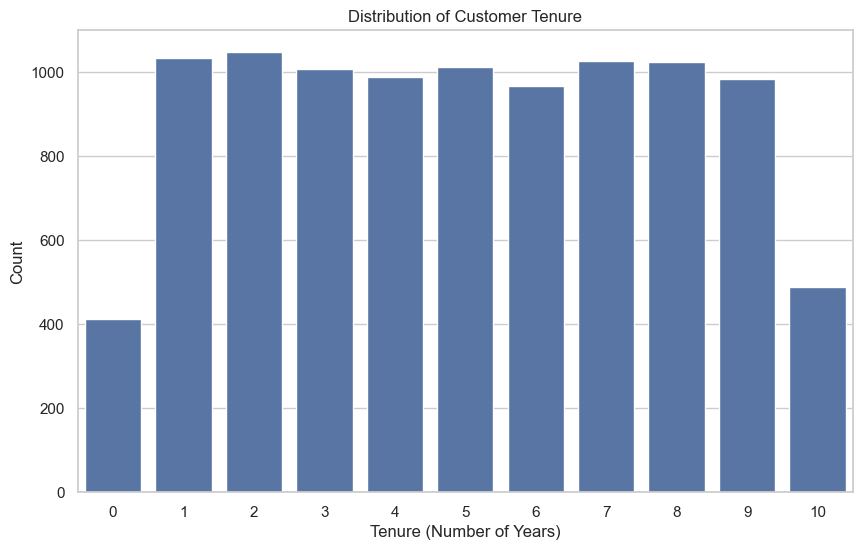

In [188]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='tenure')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Number of Years)')
plt.ylabel('Count')
plt.show()

In [189]:
data['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

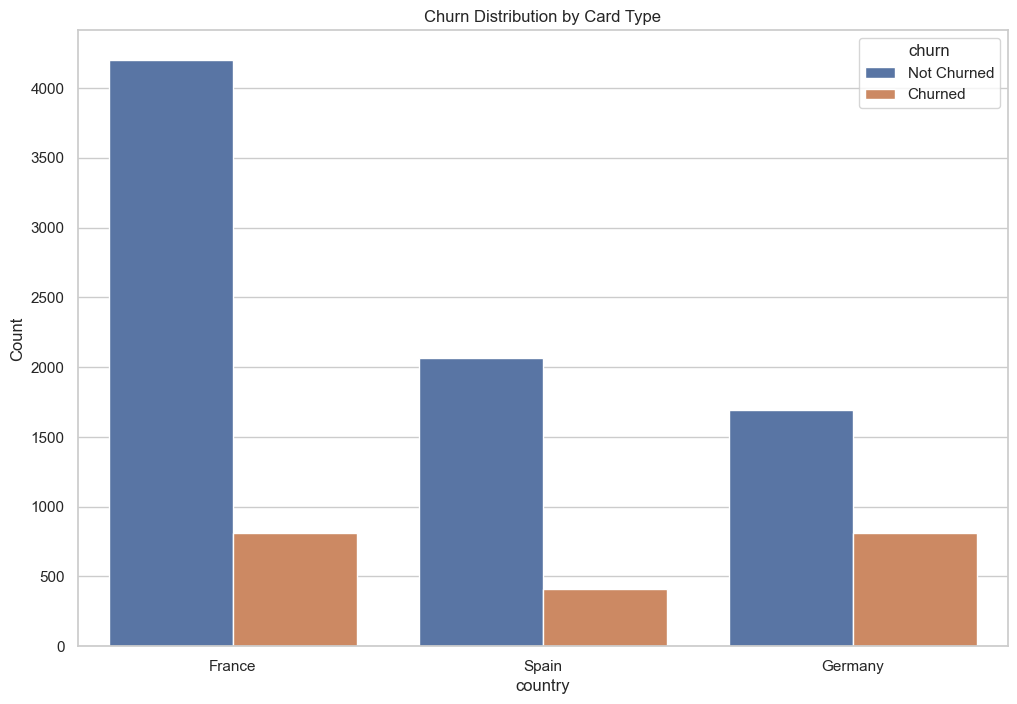

In [190]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='country', hue='churn', order=['France', 'Spain', 'Germany'])
plt.title('Churn Distribution by Card Type')
plt.xlabel('country')
plt.ylabel('Count')
plt.legend(title='churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

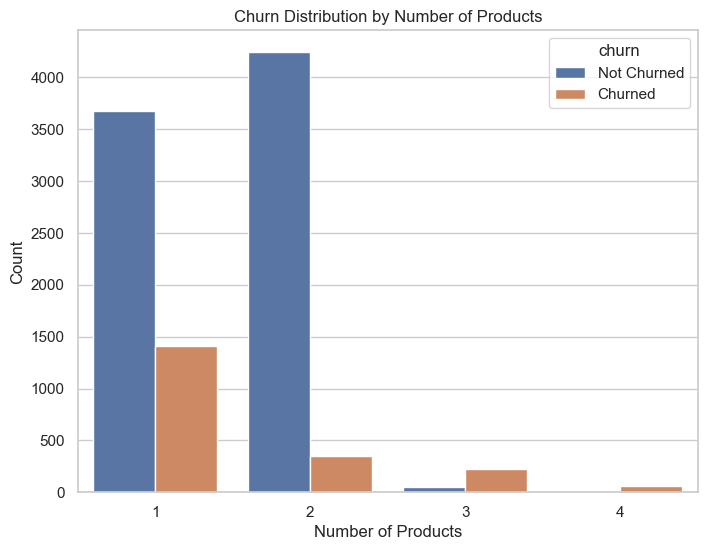

In [191]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='products_number', hue='churn')
plt.title('Churn Distribution by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

In [192]:
churn_percentage_by_product_count = data.groupby('products_number')['churn'].mean() * 100


print("Persentase Churn dari Jumlah Produk:")
print(churn_percentage_by_product_count)

Persentase Churn dari Jumlah Produk:
products_number
1    27.7144
2     7.5817
3    82.7068
4   100.0000
Name: churn, dtype: float64


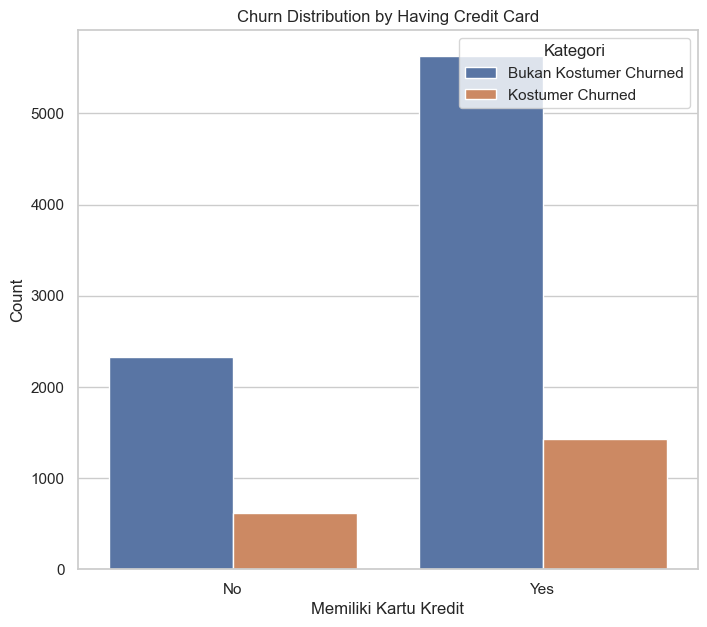

In [193]:
plt.figure(figsize=(8, 7))
sns.countplot(data=data, x='credit_card', hue='churn')
plt.title('Churn Distribution by Having Credit Card')
plt.xlabel('Memiliki Kartu Kredit')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes']) 


plt.legend(title='Kategori', loc='upper right', labels=['Bukan Kostumer Churned', 'Kostumer Churned'])
plt.show()

In [194]:
churn_percentage_by_card = data.groupby('credit_card')['churn'].mean() * 100

print("Persentase Churn dari Kostumer Churn dengan kepemilikikan Kartu Kredit:")
print(churn_percentage_by_card)

Persentase Churn dari Kostumer Churn dengan kepemilikikan Kartu Kredit:
credit_card
0   20.8149
1   20.1843
Name: churn, dtype: float64


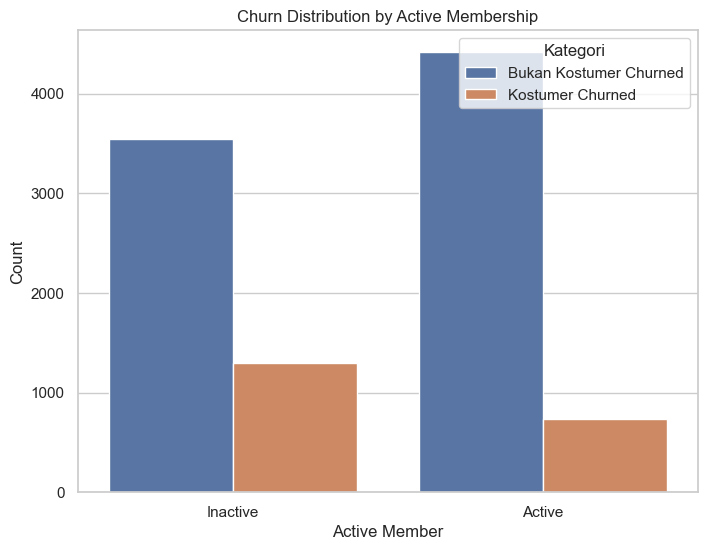

In [195]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='active_member', hue='churn')
plt.title('Churn Distribution by Active Membership')
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active']) 

plt.legend(title='Kategori', loc='upper right', labels=['Bukan Kostumer Churned', 'Kostumer Churned'])
plt.show()

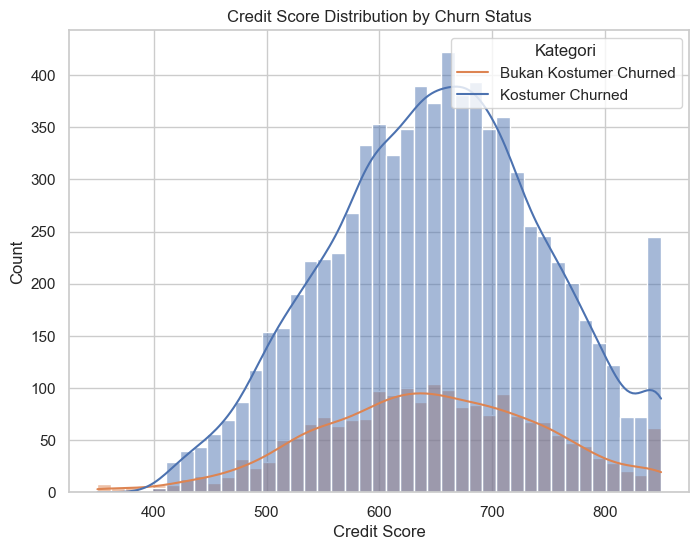

In [196]:
plt.figure(figsize=(8, 6))
sns.histplot(data, x='credit_score', hue='churn', kde=True)
plt.title('Credit Score Distribution by Churn Status')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Kategori', loc='upper right', labels=['Bukan Kostumer Churned', 'Kostumer Churned'])
plt.show()

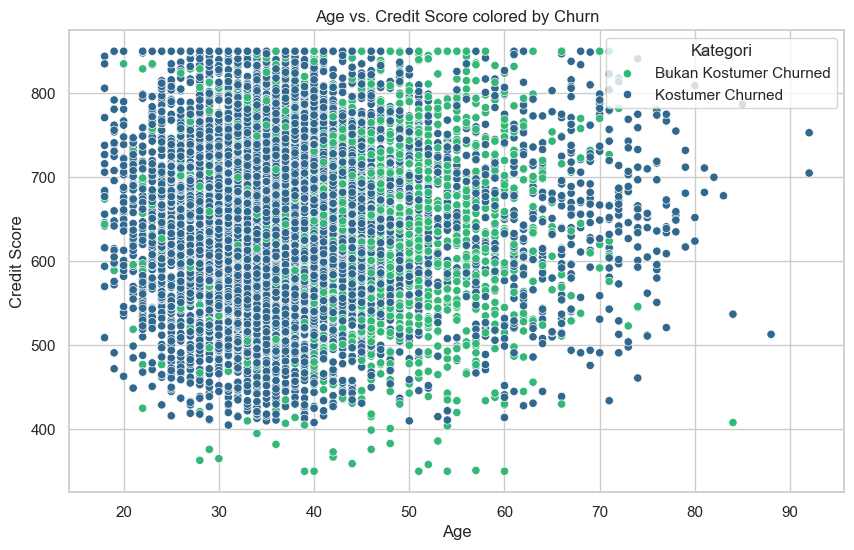

In [197]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='credit_score', hue='churn', palette='viridis')
plt.title('Age vs. Credit Score colored by Churn')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.legend(title='Kategori', loc='upper right', labels=['Bukan Kostumer Churned', 'Kostumer Churned'])
plt.show()

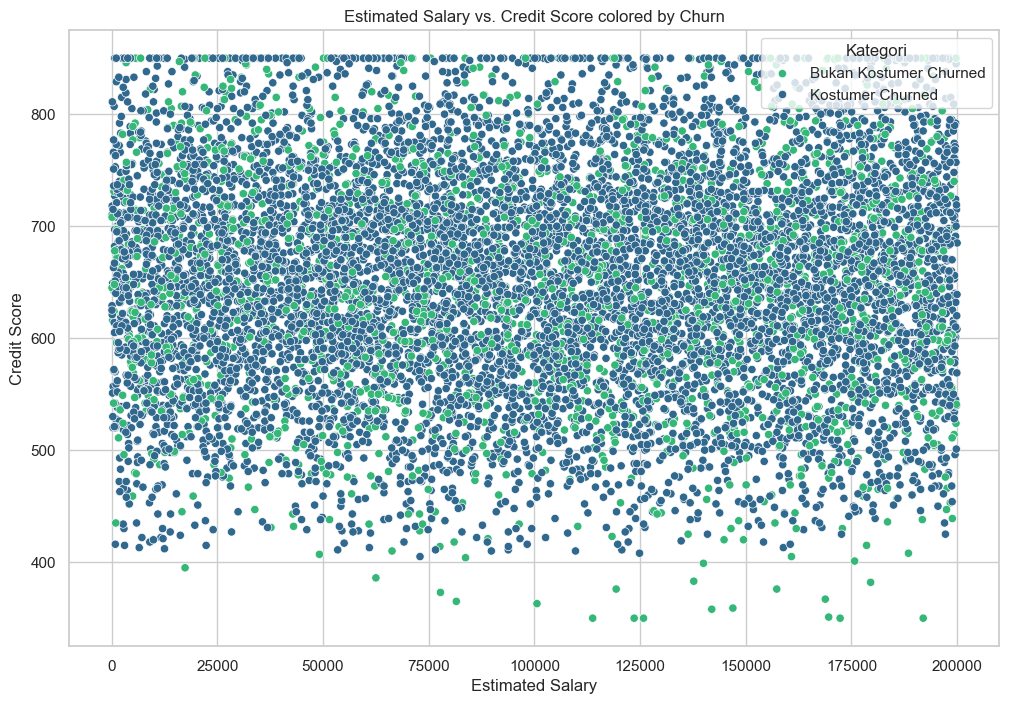

In [198]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data, x='estimated_salary', y='credit_score', hue='churn', palette='viridis')
plt.title('Estimated Salary vs. Credit Score colored by Churn')
plt.xlabel('Estimated Salary')
plt.ylabel('Credit Score')
plt.legend(title='Kategori', loc='upper right', labels=['Bukan Kostumer Churned', 'Kostumer Churned'])
plt.show()

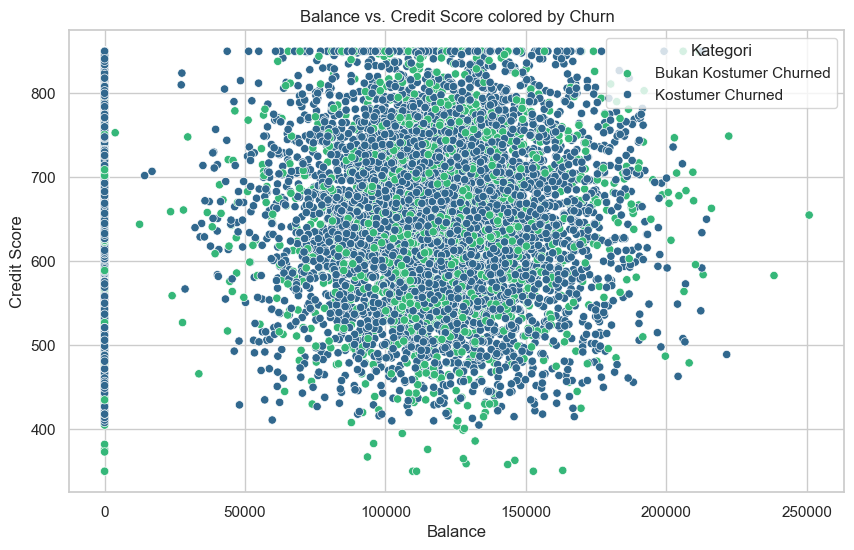

In [199]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='balance', y='credit_score', hue='churn', palette='viridis')
plt.title('Balance vs. Credit Score colored by Churn')
plt.xlabel('Balance')
plt.ylabel('Credit Score')
plt.legend(title='Kategori', loc='upper right', labels=['Bukan Kostumer Churned', 'Kostumer Churned'])
plt.show()

# Data Preparation

In [200]:
cat_columns

Index(['country', 'gender'], dtype='object')

In [201]:
dummies = pd.get_dummies(data[cat_columns], drop_first = True)
dummies.shape

(10000, 3)

In [202]:
data = pd.concat([data, dummies], axis = 1)

In [203]:
data.drop(cat_columns, axis = 1, inplace = True)
data.shape

(10000, 12)

In [167]:
data.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.0000,1,1,1,101348.8800,1,False,False,False
1,608,41,1,83807.8600,1,0,1,112542.5800,0,False,True,False
2,502,42,8,159660.8000,3,1,0,113931.5700,1,False,False,False
3,699,39,1,0.0000,2,0,0,93826.6300,0,False,False,False
4,850,43,2,125510.8200,1,1,1,79084.1000,0,False,True,False


In [168]:
data.dtypes

credit_score          int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
country_Germany        bool
country_Spain          bool
gender_Male            bool
dtype: object

In [169]:
data['churn'].is_unique

False

In [204]:
X = data.drop('churn', axis=1)

y = data['churn'] 

X

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
0,619,42,2,0.0000,1,1,1,101348.8800,False,False,False
1,608,41,1,83807.8600,1,0,1,112542.5800,False,True,False
2,502,42,8,159660.8000,3,1,0,113931.5700,False,False,False
3,699,39,1,0.0000,2,0,0,93826.6300,False,False,False
4,850,43,2,125510.8200,1,1,1,79084.1000,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.0000,2,1,0,96270.6400,False,False,True
9996,516,35,10,57369.6100,1,1,1,101699.7700,False,False,True
9997,709,36,7,0.0000,1,0,1,42085.5800,False,False,False
9998,772,42,3,75075.3100,2,1,0,92888.5200,True,False,True


In [205]:
y.dtypes

dtype('int64')

In [206]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [207]:
X_train.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
9254,686,32,6,0.0000,2,1,1,179093.2600,False,False,True
1561,632,42,4,119624.6000,2,1,1,195978.8600,True,False,True
1670,559,24,3,114739.9200,1,1,0,85891.0200,False,True,True
6087,561,27,9,135637.0000,1,1,0,153080.4000,False,False,False
6669,517,56,9,142147.3200,1,0,0,39488.0400,False,False,True


In [208]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,8000.0000,651.6476,96.3662,350.0000,585.0000,653.0000,719.0000,850.0000
age,8000.0000,38.8978,10.5190,18.0000,32.0000,37.0000,44.0000,92.0000
tenure,8000.0000,5.0039,2.8818,0.0000,3.0000,5.0000,7.0000,10.0000
balance,8000.0000,76102.1396,62461.0058,0.0000,0.0000,96447.5200,127611.3325,250898.0900
products_number,8000.0000,1.5314,0.5797,1.0000,1.0000,1.0000,2.0000,4.0000
credit_card,8000.0000,0.7035,0.4567,0.0000,0.0000,1.0000,1.0000,1.0000
active_member,8000.0000,0.5128,0.4999,0.0000,0.0000,1.0000,1.0000,1.0000
estimated_salary,8000.0000,100431.2898,57518.9204,90.0700,51364.1250,100487.7200,149595.8425,199970.7400


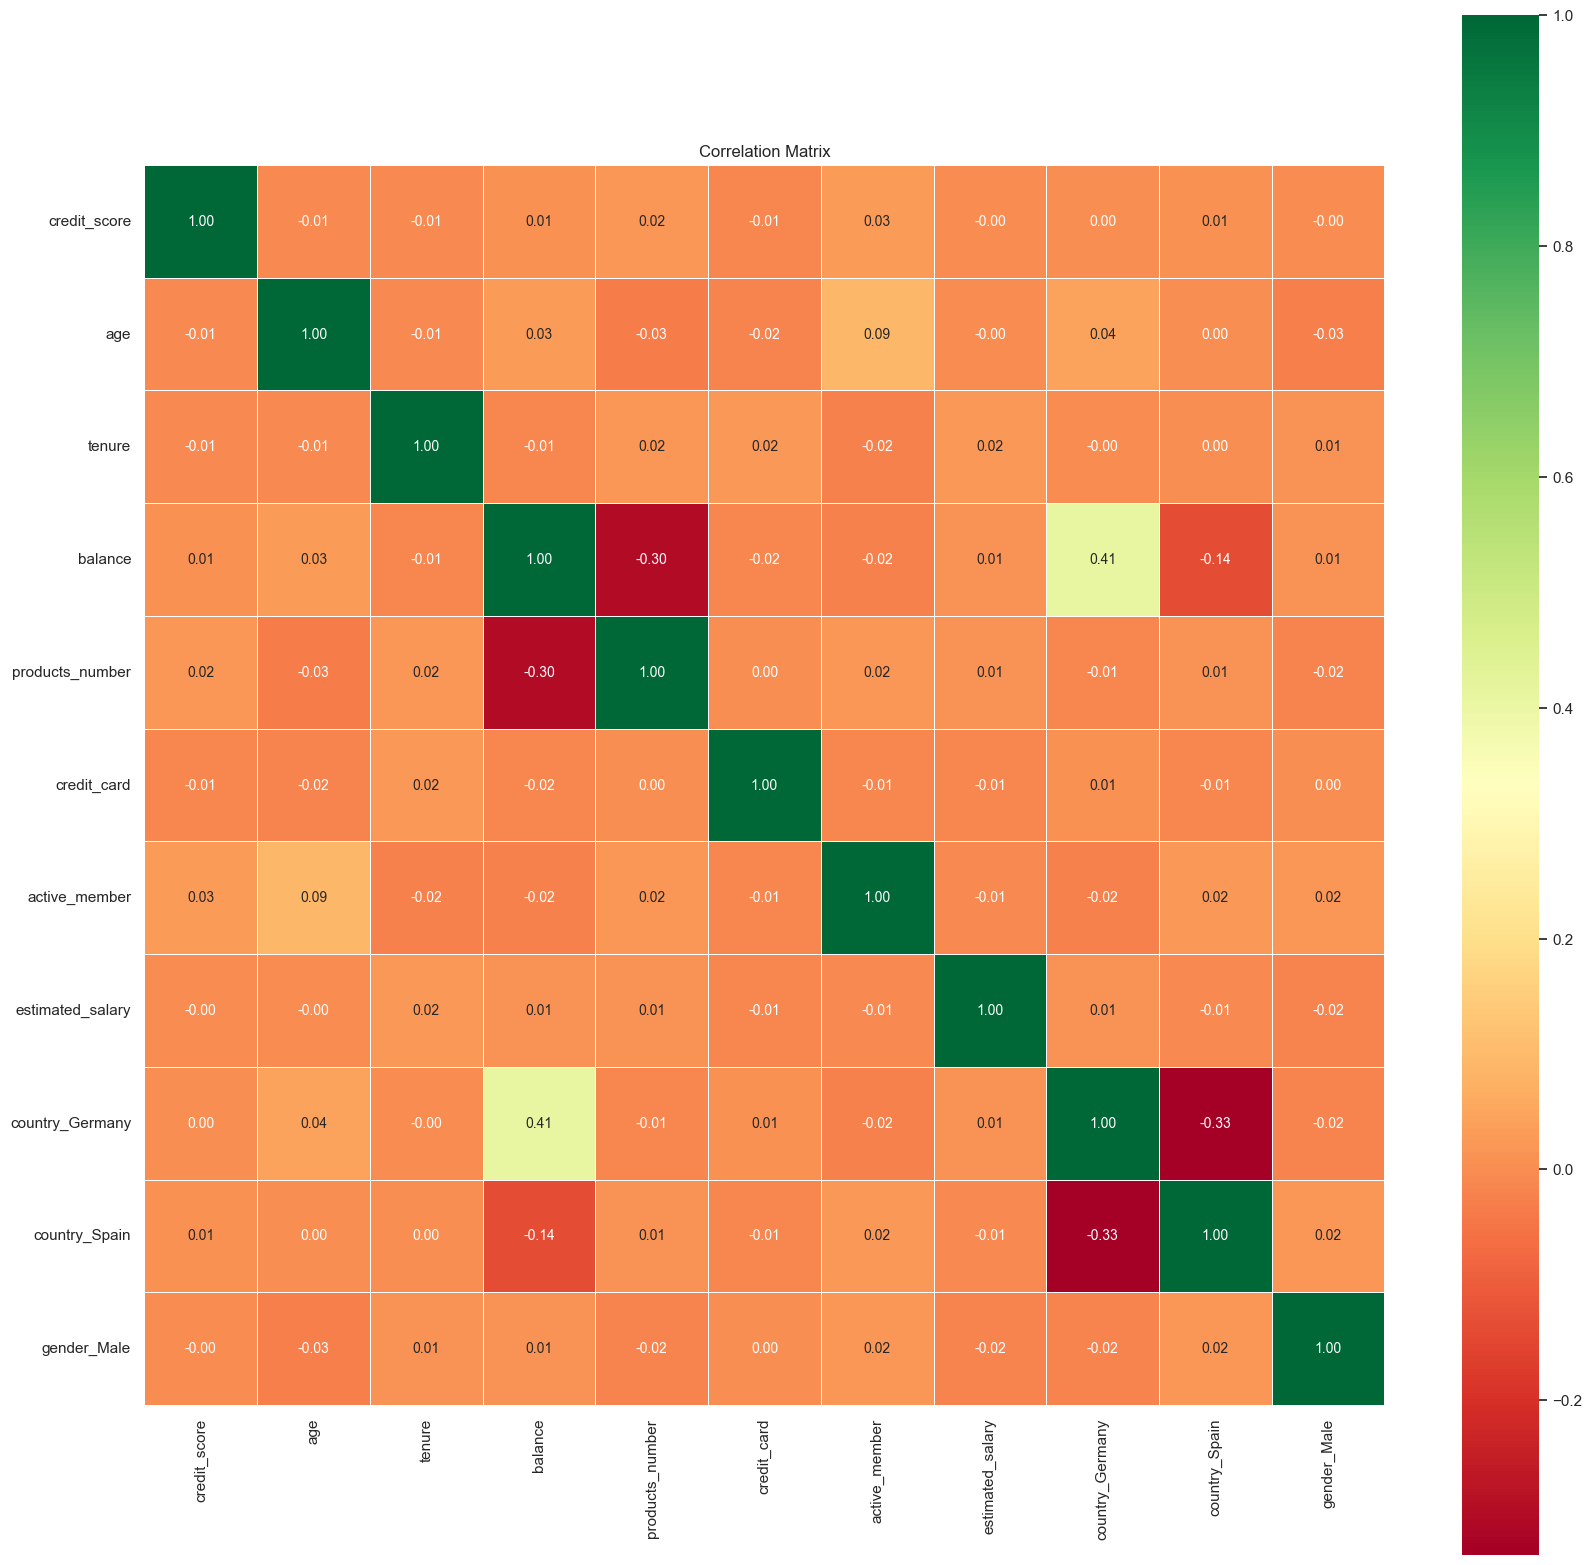

In [209]:
plt.figure(figsize=(20, 20))
corr = X_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap="RdYlGn", annot=True, fmt=".2f", annot_kws={"size": 10}, square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [210]:
data.corr()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
credit_score,1.0000,-0.0040,0.0008,0.0063,0.0122,-0.0055,0.0257,-0.0014,-0.0271,0.0055,0.0048,-0.0029
age,-0.0040,1.0000,-0.0100,0.0283,-0.0307,-0.0117,0.0855,-0.0072,0.2853,0.0469,-0.0017,-0.0275
tenure,0.0008,-0.0100,1.0000,-0.0123,0.0134,0.0226,-0.0284,0.0078,-0.0140,-0.0006,0.0039,0.0147
balance,0.0063,0.0283,-0.0123,1.0000,-0.3042,-0.0149,-0.0101,0.0128,0.1185,0.4011,-0.1349,0.0121
products_number,0.0122,-0.0307,0.0134,-0.3042,1.0000,0.0032,0.0096,0.0142,-0.0478,-0.0104,0.0090,-0.0219
credit_card,-0.0055,-0.0117,0.0226,-0.0149,0.0032,1.0000,-0.0119,-0.0099,-0.0071,0.0106,-0.0135,0.0058
active_member,0.0257,0.0855,-0.0284,-0.0101,0.0096,-0.0119,1.0000,-0.0114,-0.1561,-0.0205,0.0167,0.0225
estimated_salary,-0.0014,-0.0072,0.0078,0.0128,0.0142,-0.0099,-0.0114,1.0000,0.0121,0.0103,-0.0065,-0.0081
churn,-0.0271,0.2853,-0.0140,0.1185,-0.0478,-0.0071,-0.1561,0.0121,1.0000,0.1735,-0.0527,-0.1065
country_Germany,0.0055,0.0469,-0.0006,0.4011,-0.0104,0.0106,-0.0205,0.0103,0.1735,1.0000,-0.3321,-0.0246


In [211]:
churn_true_count = len(data.loc[data['churn']==1])
churn_false_count = len(data.loc[data['churn']==0])

In [212]:
(churn_true_count, churn_false_count)

(2037, 7963)

In [213]:
print('total number of rows : {0}'.format(data.shape[0]))
print('total number of columns : {0}'.format(data.shape[1]))

total number of rows : 10000
total number of columns : 12


In [214]:
print('banyak baris nilai nol (0) untuk value kredit skor : {0}'.format(len(data.loc[data['credit_score']==0])))
print('banyak baris nilai nol (0) untuk value kartu kredit : {0}'.format(len(data.loc[data['credit_card']==0])))
print('banyak baris nilai nol (0) untuk value member aktif skor : {0}'.format(len(data.loc[data['active_member']==0])))
print('banyak baris nilai nol (0) untuk value churn skor : {0}'.format(len(data.loc[data['churn']==0])))

banyak baris nilai nol (0) untuk value kredit skor : 0
banyak baris nilai nol (0) untuk value kartu kredit : 2945
banyak baris nilai nol (0) untuk value member aktif skor : 4849
banyak baris nilai nol (0) untuk value churn skor : 7963


In [215]:
data2 = data.copy()

In [216]:
avg_credit_score = data2['credit_score'].mean()
avg_credit_card = data2['credit_card'].mean()
avg_active_member = data2['active_member'].mean()
avg_churn = data2['churn'].mean()

In [217]:
data2['credit_score'].replace({0:avg_credit_score},inplace=True)
data2['credit_card'].replace({0:avg_credit_card},inplace=True)
data2['active_member'].replace({0:avg_active_member},inplace=True)
data2['churn'].replace({0:avg_churn},inplace=True)

# Apply Model

In [227]:
from sklearn.naive_bayes import GaussianNB  

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

naive_bayes_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Gaussian Naive Bayes model:", naive_bayes_accuracy)

Accuracy of the Gaussian Naive Bayes model: 0.791


In [219]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1607
           1       0.34      0.07      0.11       393

    accuracy                           0.79      2000
   macro avg       0.58      0.52      0.50      2000
weighted avg       0.72      0.79      0.73      2000



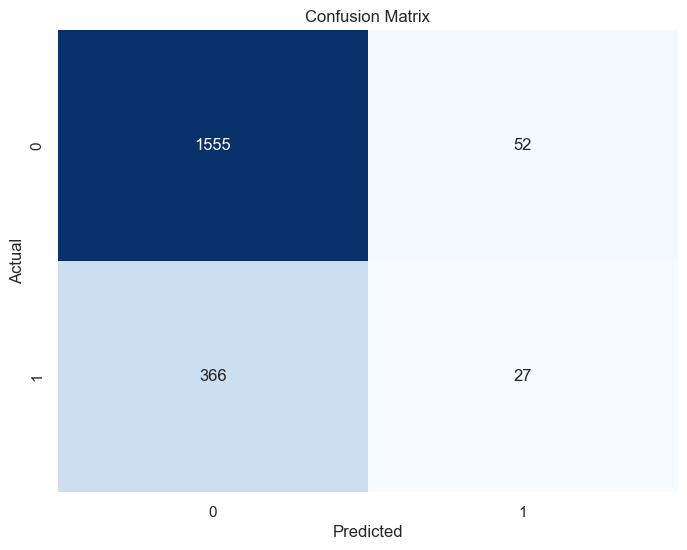

In [220]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [221]:
model_accuracies_train = { 'Naive Bayes': naive_bayes_accuracy }

accuracy_data = pd.DataFrame(list(model_accuracies_train.items()), columns=['Model Name', 'Accuracy'])

accuracy_data = accuracy_data.sort_values(by='Accuracy', ascending=False)

accuracy_data

,Model Name,Accuracy
0,Naive Bayes,0.7910


In [222]:
data2 = data.copy()

In [223]:
data2 = data["age"].mean()

In [224]:
data2 = data.mean()

In [225]:
print("Get mean of entire DataFrame:\n", data2)

Get mean of entire DataFrame:
 credit_score          650.5288
age                    38.9218
tenure                  5.0128
balance             76485.8893
products_number         1.5302
credit_card             0.7055
active_member           0.5151
estimated_salary   100090.2399
churn                   0.2037
country_Germany         0.2509
country_Spain           0.2477
gender_Male             0.5457
dtype: float64


In [226]:
import pickle

pickle.dump(model,open('GaussianNB.pkl','wb'))

In [228]:
X_test

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
6252,596,32,3,96709.0700,2,0,0,41788.3700,True,False,True
4684,623,43,1,0.0000,2,1,1,146379.3000,False,False,True
1731,601,44,4,0.0000,2,1,0,58561.3100,False,True,False
4742,506,59,8,119152.1000,2,1,1,170679.7400,True,False,True
4521,560,27,7,124995.9800,1,1,1,114669.7900,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
6412,602,53,5,98268.8400,1,0,1,45038.2900,True,False,False
8285,609,25,10,0.0000,1,0,1,109895.1600,False,False,True
7853,730,47,7,0.0000,1,1,0,33373.2600,False,False,False
1095,692,29,4,0.0000,1,1,0,76755.9900,False,False,True
